In [34]:
import os
import sys
import numpy as np
sys.path.insert(0, '../pybswarm')

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
import bswarm.trajectory_generation as tgen
import bswarm.formation as form
import bswarm

# A flat P formation

Text(0.5, 0.92, 'flat P')

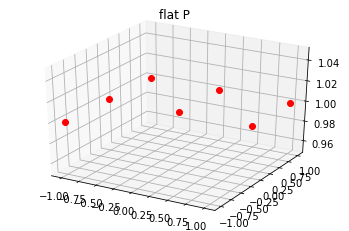

In [42]:
P = np.array([
    [-1, 1, 1],
    [0, 1, 1],
    [1, 1, 1],
    [-1, 0, 1],
    [0, 0, 1],
    [1, 0, 1],
    [-1, -1, 1]
]).T
plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(P[0, :], P[1, :], P[2, :], 'ro')
plt.title('flat P')

# A slanted P formation

Text(0.5, 0.92, 'slanted P')

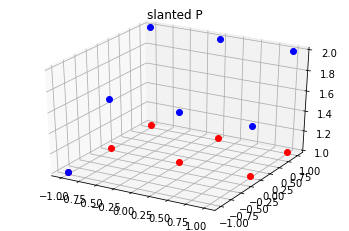

In [43]:
P2 = np.array([
    [-1, 1, 2],
    [0, 1, 2],
    [1, 1, 2],
    [-1, 0, 1.5],
    [0, 0, 1.5],
    [1, 0, 1.5],
    [-1, -1, 1]
]).T

plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(P[0, :], P[1, :], P[2, :], 'ro')
ax.plot3D(P2[0, :], P2[1, :], P2[2, :], 'bo')
plt.title('slanted P')

# Rotated Slanted P Waypoints

Text(0.5, 0.92, 'waypoints')

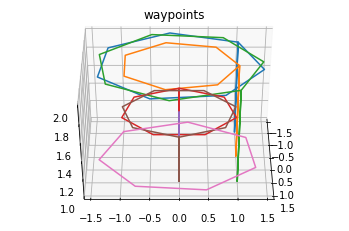

In [44]:
# %% Create waypoints for flat P -> slanted P -> rotating slanted P -> flat P
waypoints = [P]
for theta in np.linspace(0, 2 * np.pi, 8):
    waypoints.append(form.rotate_points_z(P2, theta))
waypoints.append(P)
waypoints = np.array(waypoints)

plt.figure()
ax = plt.axes(projection='3d')
for point in range(waypoints.shape[2]):
    ax.plot3D(waypoints[:, 0, point], waypoints[:, 1, point], waypoints[:, 2, point], '-')
    ax.view_init(azim=0, elev=40)
plt.title('waypoints')

# Trajectory Planning

Text(0.5, 0.92, 'planned trajectories')

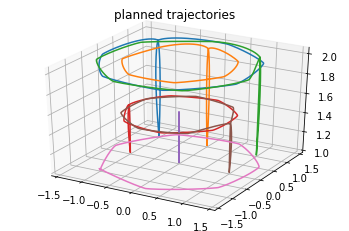

In [46]:
dist = np.linalg.norm(waypoints[1:, :, :] - waypoints[:-1, :, :], axis=1)
dist_max = np.max(dist, axis=1)
dist_max

drone_list = []

T = 10 * np.ones(dist.shape[0])

for drone in range(waypoints.shape[2]):
    planner = tgen.plan_min_snap
    trajx = planner(waypoints[:, 0, drone], T)
    trajy = planner(waypoints[:, 1, drone], T)
    trajz = planner(waypoints[:, 2, drone], T)
    drone_list.append([trajx, trajy, trajz])

plt.figure()
ax = plt.axes(projection='3d')
for trajx, trajy, trajz in drone_list:
    ax.plot3D(
        trajx.compute_trajectory()['x'],
        trajy.compute_trajectory()['x'],
        trajz.compute_trajectory()['x'])
plt.title('planned trajectories')

# Time History of Trajectories

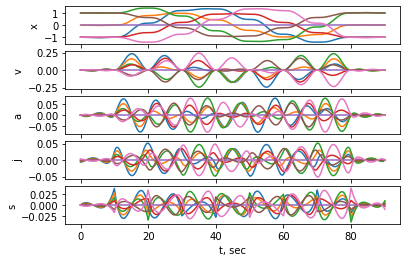

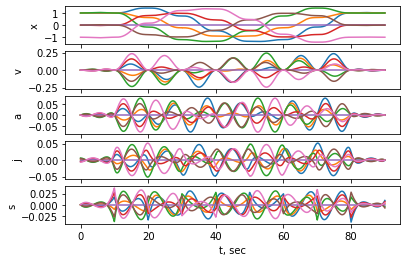

In [49]:
plt.figure()
for trajx, trajy, trajz in drone_list:
   trajx.plot()

plt.figure()
plt.title('y trajectory')
for trajx, trajy, trajz in drone_list:
   trajy.plot()